<a href="https://colab.research.google.com/github/lamontdobbins3-stack/DataScience/blob/main/Text_Processing_on_Airline_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory *Linguistic* Analysis!
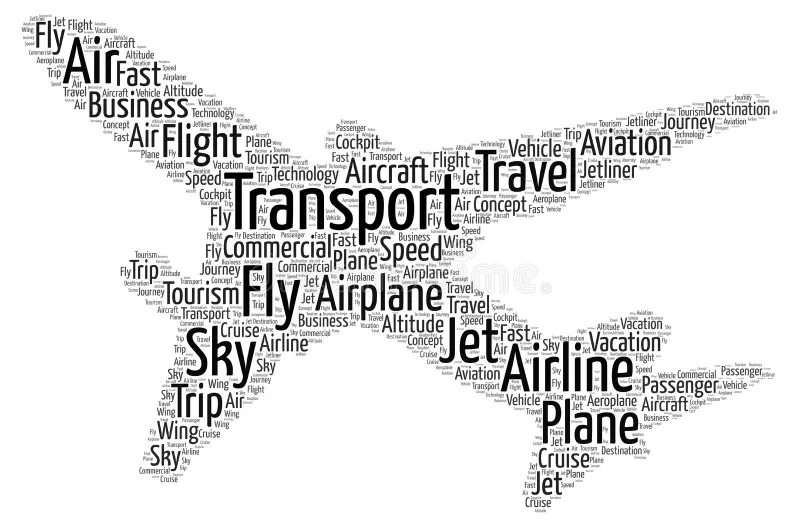
A special EDA on Linguistics. In this analysis, I will explore some basic Natural Language Processing (NLP) techniques to do some analysis on the type of words in the text feedback portion of the dataset. Imagine having to read through millions of words of text... it isnt possible. NLP fixes that - fast.

Computers usually read code in the form of numbers (hence why we have to create dummy variables and such), but NLP is a special technique where you can to a degree perform analysis on text itself. It does require turning text into numbers, called vectors, but for now here is a simple analysis you can do on any large group of text.

In [ ]:
#import libraries
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import spacy
nlp = spacy.load("en_core_web_sm")
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Load Dataset
file_path = "BA_AirlineReviews.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.HUGGING_FACE,
  "chaudharyanshul/airline-reviews",
  file_path,
)

print("Hugging Face Dataset:", hf_dataset)
print("Sanity check: ")
print(df["ReviewBody"][:5])

/tmp/ipython-input-966050842.py:5: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'airline-reviews' dataset.
Hugging Face Dataset: Dataset({
    features: ['Unnamed: 0', 'OverallRating', 'ReviewHeader', 'Name', 'Datetime', 'VerifiedReview', 'ReviewBody', 'TypeOfTraveller', 'SeatType', 'Route', 'DateFlown', 'SeatComfort', 'CabinStaffService', 'GroundService', 'ValueForMoney', 'Recommended', 'Aircraft', 'Food&Beverages', 'InflightEntertainment', 'Wifi&Connectivity'],
    num_rows: 3701
})
Sanity check: 
['4 Hours before takeoff we received a Mail stating a cryptic message that there are disruptions to be expected as there is a limit on how many planes can leave at the same time. So did the capacity of the Heathrow Airport really hit British Airways by surprise, 4h before departure? Anyhow - we took the one hour delay so what - but then we have been forced to check in our Hand luggage. I travel only with hand luggage to avoid waiting for the ultra slow processing of the checked in luggage. Overall 2h later at home than planed,

In [ ]:
#Get Stopwords (industry specific) SET MY OWN AFTER
STOPWORDS = set(stopwords.words('english'))

airline_stopwords = {
    "airline", "airlines", "flight", "flights", "ba", "british", "british airways", "trip", "trips", "fly", "flying", "travel", "travelling", "traveling"
}

#Preserve Negations
NEGATIONS = {"no", "not", "never", "n't", "nor"}
ENTITIES = {"I","me","them"}
SMART_STOPWORDS = STOPWORDS - NEGATIONS - ENTITIES
SMART_STOPWORDS |= airline_stopwords


#Remove Stopwords & SpaCy Tokenization
def clean(batch):
    cleaned = []

    #SpaCy Pipeline to Works on a List of Texts
    docs = nlp.pipe(batch["ReviewBody"])

    for doc in docs:
        tokens = [
            token.text.lower()
            for token in doc
            if token.text.lower() not in SMART_STOPWORDS
            and not token.is_punct
            and not token.is_space
        ]
        cleaned.append(" ".join(tokens))

    return {"ReviewBodyCleaned": cleaned}

df = df.map(clean, batched=True)

#Word Frequency
from collections import Counter

all_words = " ".join(df["ReviewBodyCleaned"]).split()
freq = Counter(all_words).most_common(20)

print("\nTOP 20 MOST COMMON WORDS (after stopwords)")
print("-" * 50)
print(freq)
print("\nTOKENS BEFORE AND AFTER")
print("-" *50)
for i in range(1):
    print("Original:", df["ReviewBody"][i])
    print("Original token count:", df["original_len"][i])
    print("Cleaned:", df["ReviewBodyCleaned"][i])
    print("Cleaned token count:", df["cleaned_len"][i])
    print("-" * 50)

Map:   0%|          | 0/3701 [00:00<?, ? examples/s]


TOP 20 MOST COMMON WORDS (after stopwords)
--------------------------------------------------
[('not', 4637), ('no', 3002), ('service', 2832), ('seat', 2391), ('food', 2354), ('london', 2221), ('crew', 2148), ('airways', 2134), ('seats', 2097), ('time', 2081), ('good', 2063), ('cabin', 1972), ('class', 1893), ("n't", 1853), ('would', 1637), ('one', 1622), ('staff', 1581), ('business', 1579), ('heathrow', 1544), ('economy', 1430)]

TOKENS BEFORE AND AFTER
--------------------------------------------------
Original: 4 Hours before takeoff we received a Mail stating a cryptic message that there are disruptions to be expected as there is a limit on how many planes can leave at the same time. So did the capacity of the Heathrow Airport really hit British Airways by surprise, 4h before departure? Anyhow - we took the one hour delay so what - but then we have been forced to check in our Hand luggage. I travel only with hand luggage to avoid waiting for the ultra slow processing of the checke

In [ ]:
#Example Negation Issue
example = "Not a reliable airline. You cannot trust the timing at all. I had a 6.45am flight, boarding was on t..."

doc = nlp(example)

standard = " ".join(
    t.text.lower() for t in doc
    if t.text.lower() not in STOPWORDS and not t.is_punct
)

smart = " ".join(
    t.text.lower() for t in doc
    if t.text.lower() not in SMART_STOPWORDS and not t.is_punct
)

print("\nNEGATION PROBLEM EXAMPLE")
print(f"Original: {example}")
print(f"Standard cleaned: {standard}")
print(f"Smart cleaned: {smart}")



NEGATION PROBLEM EXAMPLE
Original: Not a reliable airline. You cannot trust the timing at all. I had a 6.45am flight, boarding was on t...
Standard cleaned: reliable airline trust timing 6.45am flight boarding
Smart cleaned: not reliable airline not trust timing 6.45am flight boarding


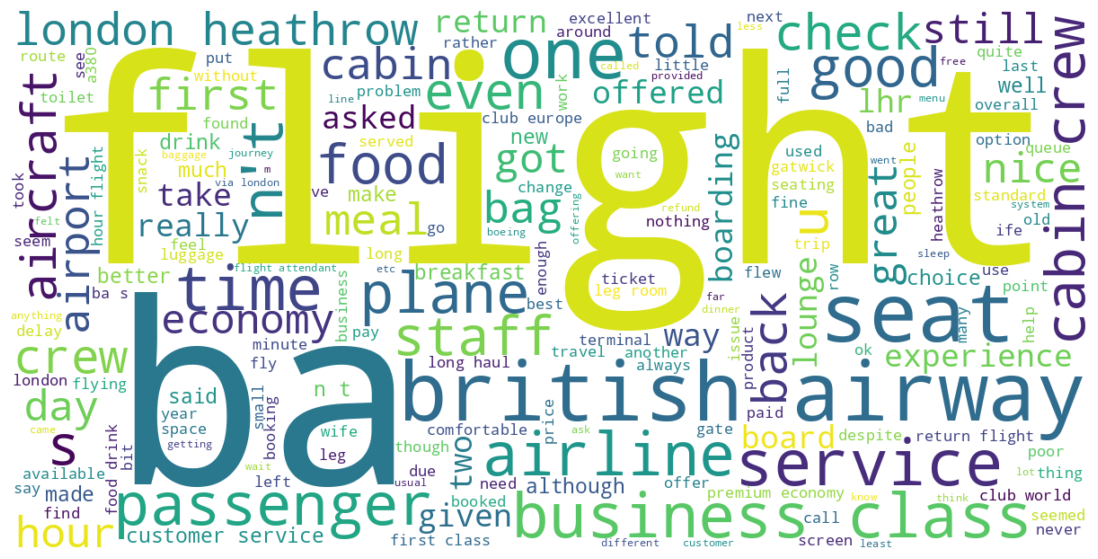

In [ ]:
#Word Cloud
all_text = " ".join(df["ReviewBodyCleaned"])

#Generate word cloud
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color="white",
    colormap="viridis"
).generate(all_text)

#Display
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Questions**
1. We removed stop words like "no", "not" and "never". These could give very important sentimnt analysis data. For example, "I will take this airline again" and "I will *never* take this airline again" hold two very different meaning and make the stopword very impactful to the sentiment score it recieves.

2. I chose the domain specific stop words because in aviation, most reviews will be already talking about the flight or airline which we already know the brand and perspective of the survey (post flight). Therefore, we do not need anything related to that such as 'British Airways', 'flight' or 'flights' and instead want to derrive the meaning behind those flights.

3. You should preserve negations when they hold emotional or opinionated weight to the text data you are analyzing. You should remove them when doing things like bag of words where we need to reduce the noisiness of the text and limit it to the true value of the string for tokenization.

4. An example aggresive text cleaning would hurt my analysis results would be when we add too many stopwords and end up with too little words of value to analyze. An example could be, "The product was not plesant or my favorite." Aggressive cleaning would make this "product plesant favorite". Not quite the same connotation.
